<a href="https://colab.research.google.com/github/Nabizeus/TOAR_Julich/blob/main/TOAR_Ozone_Forecast4Julich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting started with TOAR-II data**[<img style="float: right;" src="2022-02-Logo-TOAR-DataBase.png" alt="" width="200"/>](2022-02-Logo-TOAR-DataBase.png)
(by Niklas Selke and Sabine Schröder)

___

**This Python notebook follows the examples from the [TOAR Quick Start Guide](https://toar-data.fz-juelich.de/sphinx/TOAR_UG_Vol02_Quick_Start/build/html/examples.html).**

## **Set up kernel (only needed the very first time)**
When you execute the notebook for the very first time please go to the next cell and press **y** to enable the cell.
After that, press **Ctrl+Enter** to execute the cell (takes about a minute).
Finally, after execution has finished, disable the cell again by pressing **r**. We do not need this cell again.

For all notebooks please choose the **TOARWorkshop** kernel in the top right corner which is now available.

## Import Python packages

In [1]:
from io import StringIO
import json
import pprint as pp

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import requests

**[StringIO](https://docs.python.org/3/library/io.html#io.StringIO)**: creates a file-like object from a simple string
**[json](https://docs.python.org/3/library/json.html)**: module for processing JSON formatted files and strings
**[pprint](https://docs.python.org/3/library/pprint.html)**: module for formatted print outputs (see also [pprint.ipynb](pprint.ipynb))
**[matplotlib](https://matplotlib.org/)**: package for plotting
**[pandas](https://pandas.pydata.org/)**: package for data analysis and manipulation
**[requests](https://requests.readthedocs.io)**: package for sending HTTPS requests

### 1. Find stations by country

The TOAR-II database stores all countries in [ISO-3166 ALPHA-2 codes](https://en.wikipedia.org/wiki/ISO_3166-1#Current_codes).
To search for all stations of a specific country, you use the argument _country_ and its ALPHA-2 code.

In [2]:
# provides all stations from Andorra(AD) and Gibraltar(GI)
resp = requests.get("https://toar-data.fz-juelich.de/api/v2/stationmeta/?country=DE&limit=None", timeout=(3.05, 5))
stations = resp.json()

for ind in range(0,1):
    print(stations[ind]['id'])
    print(stations[ind]['codes'])
    print(stations[ind]['name'])
# Access nested variables
for item in data:
    name = item[1]
    #age = item["age"]
    #city = item["address"]["city"]
    #state = item["address"]["state"]
    #print(f"Name: {id}")
    #print(f"Name: {name}, Age: {age}, City: {city}, State: {state}")
print(stations)

ReadTimeout: ignored

### 2. Find all time series of one station

From the last command, we found the station Escaldes-Engordany (Andorra). Its station code is AD0942A.
Now we want to extract the metadata of all time series for this specific station that are stored in the TOAR database.

In [3]:
resp = requests.get("https://toar-data.fz-juelich.de/api/v2/search/?codes=DEUB001&variable_id=5&limit=None", timeout=(3.05, 5))
metadata = resp.json()

In [4]:
for i in range(0,2):
    print(metadata[i]['id'])

18855
31070


### 3. Download data of a specific time series

From the previous results, we choose the time series of ozone from the resource_provider (roles) European Environment Agency (EEA) with id 24896.
We want to download all available data in csv format, which is possible by providing the argument _format=csv_.
This means that data is no longer provided in JSON format (and we cannot use json() to access it).
We want to read the data into a pandas DataFrame.
(_Data from the TOAR-II database will always be delivered with its related metadata!_)

In [5]:

URL = "https://toar-data.fz-juelich.de/api/v2/data/timeseries/18855?format=csv&daterange=2010-05-01T00:00:00,2010-05-05T08:00:00"
#URL = "https://toar-data.fz-juelich.de/api/v2/search/?bounding_box=49,7,50,8&variable_id=21&limit=None"

resp = requests.get(URL)
pp.pprint(resp)
# save to file
with open("StationDEUB001_timeseries_id18855_01MAY0000_2010_05MAY0800_2010_Ozone.csv", "w") as file:
    file.write(resp.text)


<Response [200]>


In [6]:
URL_forecast = "https://toar-data.fz-juelich.de/api/v2/data/timeseries/18855?format=csv&daterange=2010-05-05T09:00:00,2010-05-05T11:00:00"
#URL = "https://toar-data.fz-juelich.de/api/v2/search/?bounding_box=49,7,50,8&variable_id=21&limit=None"

resp_forecast = requests.get(URL_forecast)
pp.pprint(resp_forecast)
# save to file
with open("StationDEUB001_timeseries_forecast_id18855_05MAY0900_2010_05MAY1100_2010_Ozone.csv", "w") as file:
    file.write(resp.text)

<Response [200]>


(For details on how we load the metadata here see [loading_metadata_from_data_download.ipynb](loading_metadata_from_data_download.ipynb))

In [ ]:
# read metadata from the top of the response
##metadata = json.loads("\n".join([line[1:] for line in resp_forecast.text.split("\n") if line.startswith("#")]))
#("metadata:")
#pp.pprint(metadata)



In [7]:
# read the actual data
#csv_file = "StationDEUB001_timeseries_id94503_JAN_2010_FEB_2010_air_temperature.csv"
data = pd.read_csv(StringIO(resp.text), comment="#", index_col="datetime", parse_dates=True, infer_datetime_format=True)
data_forecast = pd.read_csv(StringIO(resp_forecast.text), comment="#", index_col="datetime", parse_dates=True, infer_datetime_format=True)
print(f"data:\n{data_forecast}")

data:
                               value  flags                       version  \
datetime                                                                    
2010-05-05 09:00:00+00:00  39.347340      1  000001.000000.00000000000000   
2010-05-05 10:00:00+00:00  40.675626      1  000001.000000.00000000000000   
2010-05-05 11:00:00+00:00  44.384802      1  000001.000000.00000000000000   

                           timeseries_id  
datetime                                  
2010-05-05 09:00:00+00:00          18855  
2010-05-05 10:00:00+00:00          18855  
2010-05-05 11:00:00+00:00          18855  


### 4. Plot the time series

In [8]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


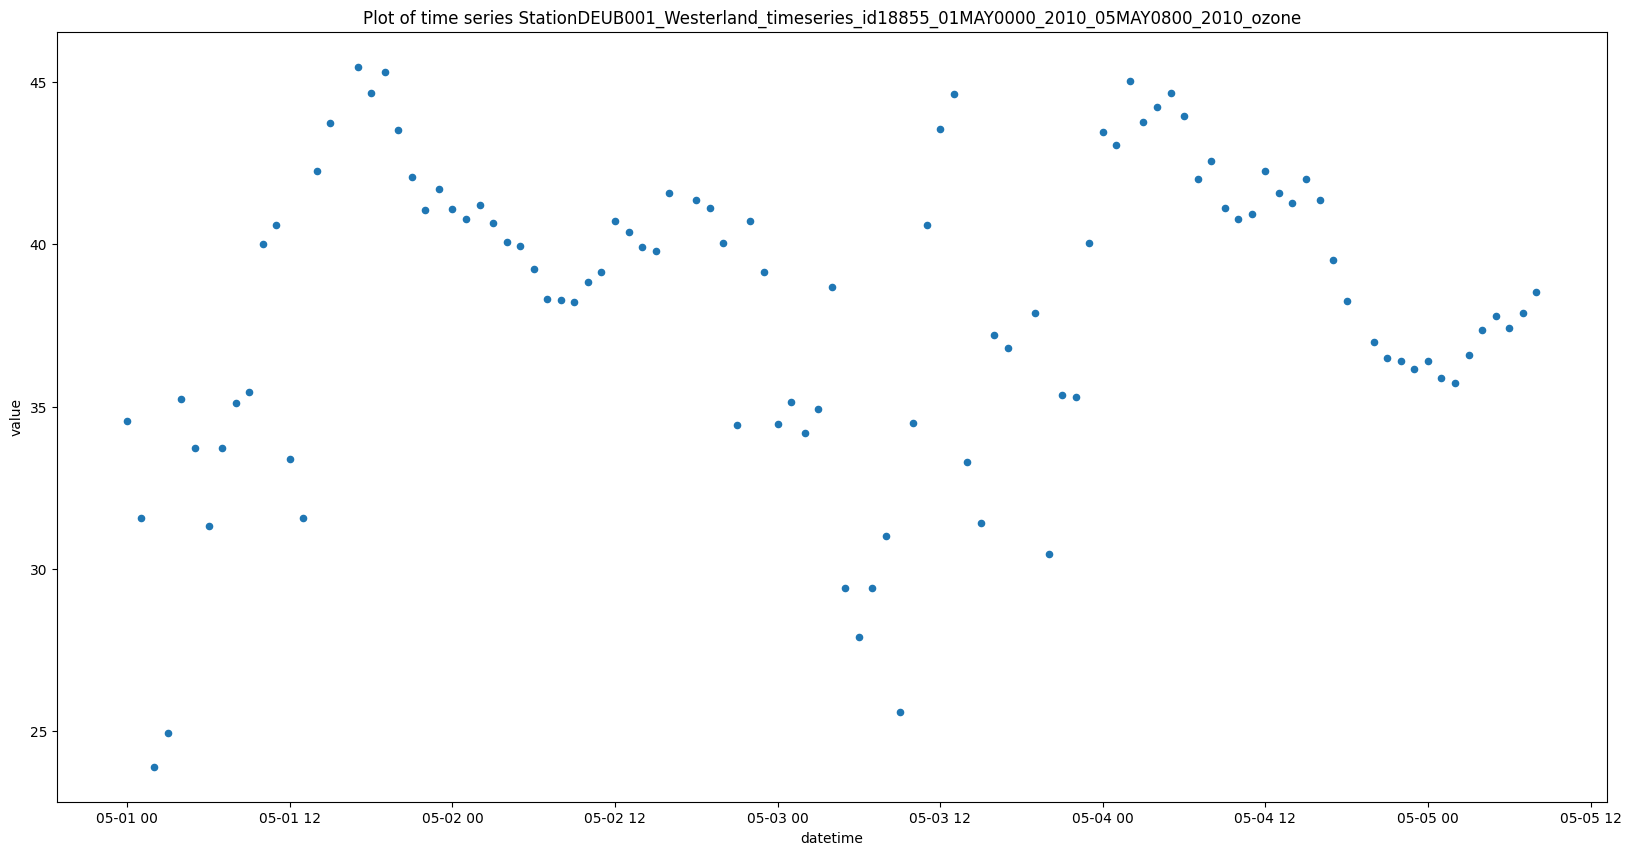

In [9]:
data.reset_index().plot(x="datetime", y="value", kind="scatter", title="Plot of time series StationDEUB001_Westerland_timeseries_id18855_01MAY0000_2010_05MAY0800_2010_ozone", figsize=(20, 10));

In [ ]:
#data.head()
data_forecast.head()

,value,flags,version,timeseries_id
datetime,,,,
2010-05-05 09:00:00+00:00,39.347340,1,000001.000000.00000000000000,18855
2010-05-05 10:00:00+00:00,40.675626,1,000001.000000.00000000000000,18855
2010-05-05 11:00:00+00:00,44.384802,1,000001.000000.00000000000000,18855


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [10]:
data.reset_index(inplace=True)
data_forecast.reset_index(inplace=True)

In [ ]:
data.head()

,datetime,value,flags,version,timeseries_id
0,2010-05-01 00:00:00+00:00,34.560498,1,000001.000000.00000000000000,18855
1,2010-05-01 01:00:00+00:00,31.578120,1,000001.000000.00000000000000,18855
2,2010-05-01 02:00:00+00:00,23.909148,1,000001.000000.00000000000000,18855
3,2010-05-01 03:00:00+00:00,24.961752,1,000001.000000.00000000000000,18855
4,2010-05-01 04:00:00+00:00,35.237172,1,000001.000000.00000000000000,18855


In [11]:
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.sort_values('datetime')
data = data[['datetime', 'value']]

In [12]:
data_forecast['datetime'] = pd.to_datetime(data_forecast['datetime'])
data_forecast = data_forecast.sort_values('datetime')
data_forecast = data_forecast[['datetime', 'value']]

In [13]:
data_forecast.head()

,datetime,value
0,2010-05-05 09:00:00+00:00,39.347340
1,2010-05-05 10:00:00+00:00,40.675626
2,2010-05-05 11:00:00+00:00,44.384802


In [14]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)


In [15]:
X_train = train_data['datetime'].astype(np.int64) // 10**9  # Convert datetime to epoch timestamp
y_train = train_data['value']
X_test = test_data['datetime'].astype(np.int64) // 10**9
y_test = test_data['value']


# Linear Regression

In [16]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)


LinearRegression()

In [17]:
print(model.fit)

<bound method LinearRegression.fit of LinearRegression()>


In [18]:
#next_timestamps = X_test[-1:].values.reshape(-1, 1) + np.array([3600, 7200, 10800])  # Add 1, 2, 3 hours to the last timestamp in the test set

predicted_values = model.predict(X_test.values.reshape(-1,1))


In [19]:
from sklearn.metrics import mean_absolute_error
y_test = test_data['value']
actual_values = y_test.values.reshape(-1,1)
# Assuming you have the actual values in a variable named 'actual_values'
mae = mean_absolute_error(actual_values, predicted_values)
print("MAE:", mae)


MAE: 2.796123668417529


In [20]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(actual_values, predicted_values)
print("MSE:", mse)


MSE: 9.231052374734372


In [21]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 3.038264697937685


In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(actual_values, predicted_values)
print("R2 Score:", r2)


R2 Score: -0.9267189767095025


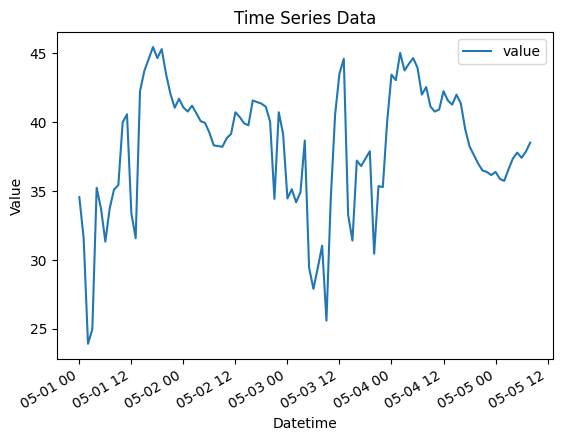

In [23]:
data.plot(x='datetime',y='value')

plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()


# ARIMA

In [24]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['value'], order=(1, 3, 1))  # Replace p, d, q with appropriate values
model_fit = model.fit()


In [25]:
forecast = model_fit.forecast(steps=3)  # Replace 3 with the number of steps you want to forecast
print(type(forecast))
print(type(data_forecast))
val_forecast = forecast.values
val_data_forecast = data_forecast['value'].values

mse = mean_squared_error(val_forecast, val_data_forecast)
rmse = np.sqrt(mse)
print('MAE', np.sum(val_forecast-val_data_forecast))
print('MSE:', mse)
print("RMSE:", rmse)



<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
MAE -4.731842301326054
MSE: 4.912040485572956
RMSE: 2.2163123619140324


In [27]:
#print('y_test series:', y_test)
#print('forecast series:', forecast)
# Concatenate the forecasted values DataFrame with the test series DataFrame
combined_data = pd.concat([y_test, forecast])

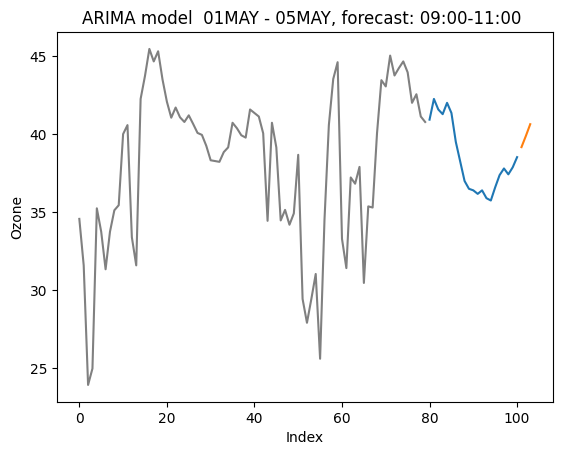

In [28]:
# Plot the combined_data
plt.plot(y_train.index, y_train,color='gray',label='Train')
plt.plot(y_test.index, y_test,label='Test')
plt.plot(forecast.index, forecast,label='Forecast')
plt.xlabel('Index')
plt.ylabel('Ozone')
plt.title('ARIMA model  01MAY - 05MAY, forecast: 09:00-11:00 ')
plt.show()

# RNN method

In [56]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [30]:
data.head()

,datetime,value
0,2010-05-01 00:00:00+00:00,34.560498
1,2010-05-01 01:00:00+00:00,31.578120
2,2010-05-01 02:00:00+00:00,23.909148
3,2010-05-01 03:00:00+00:00,24.961752
4,2010-05-01 04:00:00+00:00,35.237172


In [57]:
# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values
print('values[:4]',values[:4])

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
print('scaler',scaler)
normalized_values = scaler.fit_transform(values.reshape(-1, 1))
print('normalized_values[:4]',normalized_values[:4])


values[:4] [34.560498 31.57812  23.909148 24.961752]
scaler MinMaxScaler()
normalized_values[:4] [[0.49418605]
 [0.35581395]
 [0.        ]
 [0.04883721]]


In [58]:
# Define the size of the training set
train_size = int(len(normalized_values) * 0.8)  # 80% for training

# Split the data into training and testing sets
train_data = normalized_values[:train_size]
test_data = normalized_values[train_size:]


In [66]:
# Define the number of previous time steps to consider for each prediction
time_steps = 14

# Create input and output sequences for training and testing
def create_sequences(data, time_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps):

        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])

    return np.array(X), np.array(y)

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)




In [49]:
#print('data[1:21 ',data[0:21])
#print('data[1]',data[0:21])
#print('X_test[:10]',X_test[:2])
#print('y_test[:10] ',y_test[:2])
#print('len(X_test),len(y_test)',len(X_test),len(y_test))
#print('',type(X_test))

In [67]:
# Define the RNN model architecture
model = Sequential()
model.add(LSTM(144, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))  # Add dropout layer with a dropout rate of 0.2
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
#model.fit(X_train, y_train, epochs=50, batch_size=16)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 144)               84096     
                                                                 
 dropout_5 (Dropout)         (None, 144)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 145       
                                                                 
Total params: 84,241
Trainable params: 84,241
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
5/5 [==============================] - 5s 19ms/step - loss: 0.4203
Epoch 2/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0615
Epoch 3/20
5/5 [==============================] - 0s 30ms/step - loss: 0.1048
Epoch 4/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0536
Epoch 5/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0737
Epoch 6/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0552
Epoch 7/20
5/5 [==============================] - 0s 27ms/step - loss: 0.0438
Epoch 8/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0437
Epoch 9/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0420
Epoch 10/20
5/5 [==============================] - 0s 30ms/step - loss: 0.0429
Epoch 11/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0425
Epoch 12/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0383
Epoch 13/20
5/5 [==============================] - 0s 27ms/st

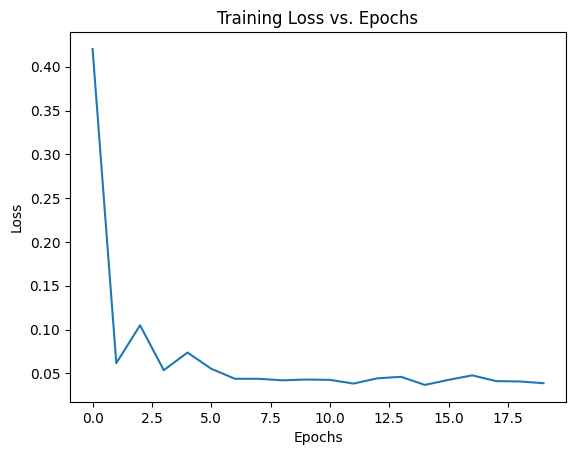

In [68]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=20, batch_size=16)

# Access the loss values from the history object
loss = history.history['loss']

# Plot the loss curve
plt.plot(range(len(loss)), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs')
plt.show()


In [69]:
# Generate predictions on the test data
y_pred = model.predict(X_test)
#print('X_test',X_test)
#print('y_pred',y_pred)
# Inverse transform the normalized predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)

# Inverse transform the normalized test data to the original scale
y_test = scaler.inverse_transform(y_test)


1/1 [==============================] - 0s 427ms/step


In [70]:
# Calculate evaluation metrics such as RMSE or MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 0.8799474341217894
MAE: 0.7700454313616082


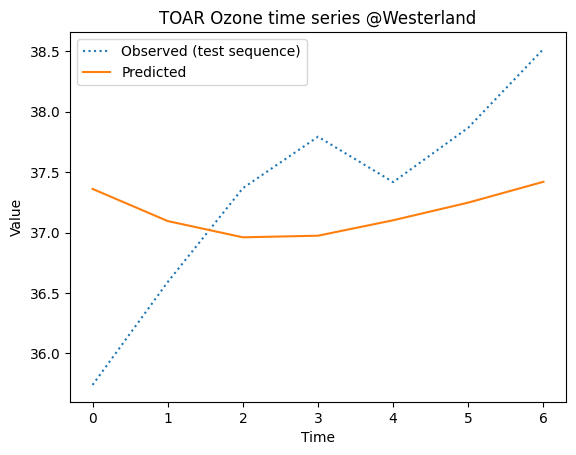

In [71]:
# Plot the actual values and the predictions
plt.plot(y_test, label='Observed (test sequence)',linestyle='dotted')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('TOAR Ozone time series @Westerland')
plt.legend()
plt.show()


In [72]:
# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)


In [73]:
# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)


1/1 [==============================] - 0s 24ms/step


In [75]:
data.values.reshape(-1,1)


array([[Timestamp('2010-05-01 00:00:00+0000', tz='UTC')],
       [34.560498],
       [datetime.time(0, 0)],
       [Timestamp('2010-05-01 01:00:00+0000', tz='UTC')],
       [31.57812],
       [datetime.time(1, 0)],
       [Timestamp('2010-05-01 02:00:00+0000', tz='UTC')],
       [23.909148],
       [datetime.time(2, 0)],
       [Timestamp('2010-05-01 03:00:00+0000', tz='UTC')],
       [24.961752],
       [datetime.time(3, 0)],
       [Timestamp('2010-05-01 04:00:00+0000', tz='UTC')],
       [35.237172],
       [datetime.time(4, 0)],
       [Timestamp('2010-05-01 05:00:00+0000', tz='UTC')],
       [33.733452],
       [datetime.time(5, 0)],
       [Timestamp('2010-05-01 06:00:00+0000', tz='UTC')],
       [31.3275],
       [datetime.time(6, 0)],
       [Timestamp('2010-05-01 07:00:00+0000', tz='UTC')],
       [33.733452],
       [datetime.time(7, 0)],
       [Timestamp('2010-05-01 08:00:00+0000', tz='UTC')],
       [35.111862],
       [datetime.time(8, 0)],
       [Timestamp('2010-05-01 0

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3
time_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, 9)
print('input_sequence',input_sequence)
# Generate the forecast for future points
forecast_0 = model.predict(input_sequence)
forecast_1 = model.predict(input_sequence)
forecast_2 = model.predict(input_sequence)

print('forecast_0',forecast_0)
print('forecast_1',forecast_1)
print('forecast_2',forecast_2)


# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast_0)
print('forecast',forecast)
# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
print('last_date',last_date)
future_dates = pd.date_range(last_date, freq = '1H', periods=future_steps, closed='right')
print('future_dates',future_dates)
# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], pd.Series(future_dates)])
print('all_dates.head()',all_dates.head())
print('all_dates.tail()',all_dates.tail())




input_sequence [[[0.57906977]
  [0.55581395]
  [0.54883721]
  [0.58837209]
  [0.6244186 ]
  [0.64418605]
  [0.62674419]
  [0.64767442]
  [0.67790698]]]
1/1 [==============================] - 0s 23ms/step
forecast_0 [[0.6286516]]
forecast_1 [[0.6286516]]
forecast_2 [[0.6286516]]
forecast [[37.458675]]
last_date 2010-05-05 08:00:00+00:00
future_dates DatetimeIndex(['2010-05-05 09:00:00+00:00', '2010-05-05 10:00:00+00:00'], dtype='datetime64[ns, UTC]', freq='H')
all_dates.head() 0   2010-05-01 00:00:00+00:00
1   2010-05-01 01:00:00+00:00
2   2010-05-01 02:00:00+00:00
3   2010-05-01 03:00:00+00:00
4   2010-05-01 04:00:00+00:00
dtype: datetime64[ns, UTC]
all_dates.tail() 98    2010-05-05 06:00:00+00:00
99    2010-05-05 07:00:00+00:00
100   2010-05-05 08:00:00+00:00
0     2010-05-05 09:00:00+00:00
1     2010-05-05 10:00:00+00:00
dtype: datetime64[ns, UTC]


<ipython-input-76-40674a23227e>:43: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, freq = '1H', periods=future_steps, closed='right')


values[-1] [38.520294]
forecast_extended=np.concatenate([values[-1:], forecast.flatten()]):  [38.520294   37.45867538]


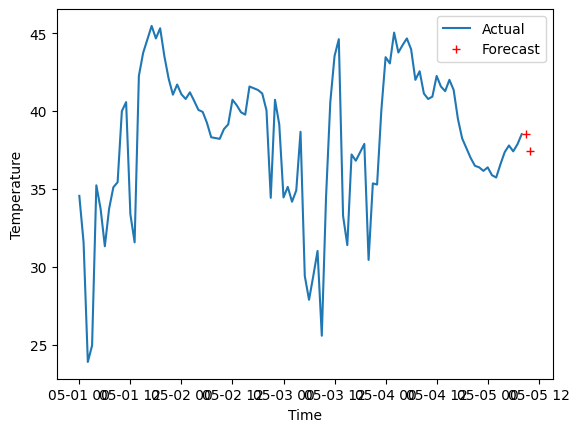

In [77]:
# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])
print('values[-1]',values[-1:])
print('forecast_extended=np.concatenate([values[-1:], forecast.flatten()]): ',forecast_extended)
# Plot the actual values and the forecasted values
plt.plot(all_dates[:len(values)], values,label='Actual')
plt.plot(all_dates[len(values):], forecast_extended,'r+', label='Forecast')

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

2010-05-05 08:00:00+00:00
DatetimeIndex(['2010-05-05 09:00:00+00:00', '2010-05-05 10:00:00+00:00',
               '2010-05-05 11:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.frame.DataFrame'>
input_sequence [[[0.56860465]
  [0.57906977]
  [0.55581395]
  [0.54883721]
  [0.58837209]
  [0.6244186 ]
  [0.64418605]
  [0.62674419]
  [0.64767442]
  [0.67790698]]]
1/1 [==============================] - 0s 22ms/step
forecast_norm [[0.63590574]]
forecast from 20 last steps [[37.61503]]
[[37.61503]]
input_sequence [[[0.57906977]
  [0.55581395]
  [0.54883721]
  [0.58837209]
  [0.6244186 ]
  [0.64418605]
  [0.62674419]
  [0.64767442]
  [0.67790698]
  [0.63590576]]]
1/1 [==============================] - 0s 23ms/step
forecast_norm [[0.6424869]]
forecast from 20 last steps [[37.756874]]
input_sequence [[[0.55581395]
  [0.54883721]
  [0.58837209]
  [0.6244186 ]
  [0.64418605]
  [0.62674419]
  [0.64767442]


<ipython-input-78-748b1f227919>:24: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, freq='1H',periods=4, closed='right')


1/1 [==============================] - 0s 28ms/step
forecast_norm [[0.6467319]]
forecast from last steps [[37.84837]]
df                      datetime      value      time
0   2010-05-01 00:00:00+00:00  34.560498  00:00:00
1   2010-05-01 01:00:00+00:00  31.578120  01:00:00
2   2010-05-01 02:00:00+00:00  23.909148  02:00:00
3   2010-05-01 03:00:00+00:00  24.961752  03:00:00
4   2010-05-01 04:00:00+00:00  35.237172  04:00:00
..                        ...        ...       ...
96  2010-05-05 04:00:00+00:00  37.367442  04:00:00
97  2010-05-05 05:00:00+00:00  37.793496  05:00:00
98  2010-05-05 06:00:00+00:00  37.417566  06:00:00
99  2010-05-05 07:00:00+00:00  37.868682  07:00:00
100 2010-05-05 08:00:00+00:00  38.520294  08:00:00

[101 rows x 3 columns]
len(df) 101
type(df) <class 'pandas.core.frame.DataFrame'>
all_dates 0     2010-05-01 00:00:00+00:00
1     2010-05-01 01:00:00+00:00
2     2010-05-01 02:00:00+00:00
3     2010-05-01 03:00:00+00:00
4     2010-05-01 04:00:00+00:00
              

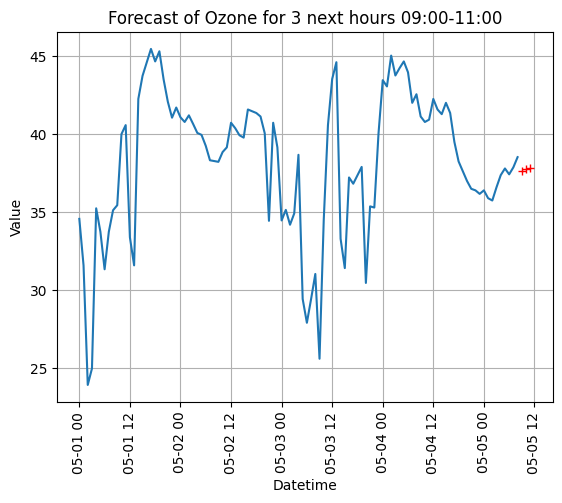

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
#data = {
#    'datetime': ['2010-05-01 00:00:00+00:00', '2010-05-01 01:00:00+00:00', '2010-05-01 02:00:00+00:00', '2010-05-01 03:00:00+00:00', '2010-05-01 04:00:00+00:00'],
#    'value': [8.20, 8.25, 8.60, 8.80, 8.90]
#}

# Create a DataFrame from the data

df = pd.DataFrame(data)

# Convert the 'datetime' column to datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the time from the 'datetime' column
df['time'] = df['datetime'].dt.time


# Generate future dates for the forecasted points
last_date = df['datetime'].iloc[-1]
print(last_date)
future_dates = pd.date_range(last_date, freq='1H',periods=4, closed='right')
print(future_dates)
print(type(future_dates))
print(type(df))
# Concatenate the original dates and the future dates
all_dates = pd.concat([df['datetime'], pd.Series(future_dates)])



# 1st Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))
# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, 10)
print('input_sequence',input_sequence)
# Generate the forecast for future points
forecast_norm = model.predict(input_sequence)
print('forecast_norm',forecast_norm)
# Inverse transform the normalized forecast to the original scale
forecast_1 = scaler.inverse_transform(forecast_norm)
print('forecast from 20 last steps',forecast_1)


# 2nd Normalize the values to a range between 0 and 1
print(forecast_1)
values_new = np.concatenate((values,forecast_1[0]))
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values_new.reshape(-1, 1))
# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, 10)
print('input_sequence',input_sequence)
# Generate the forecast for future points
forecast_norm = model.predict(input_sequence)
print('forecast_norm',forecast_norm)
# Inverse transform the normalized forecast to the original scale
forecast_2 = scaler.inverse_transform(forecast_norm)
print('forecast from 20 last steps',forecast_2)

# 3rd Normalize the values to a range between 0 and 1
values_3 = np.concatenate((values_new,forecast_2[0]))
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values_3.reshape(-1, 1))
# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, 10)
print('input_sequence',input_sequence)
# Generate the forecast for future points
forecast_norm = model.predict(input_sequence)
print('forecast_norm',forecast_norm)
# Inverse transform the normalized forecast to the original scale
forecast_3 = scaler.inverse_transform(forecast_norm)
print('forecast from last steps',forecast_3)



# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([forecast_1.flatten(),forecast_2.flatten(),forecast_3.flatten()])

print('df',df)
print('len(df)',len(df))
print('type(df)',type(df))
print('all_dates',all_dates)
print('len(all_dates)',len(all_dates))
print('type(all_dates)',type(all_dates))
print('forecast_extended',forecast_extended)
print('len(forecast_extended)',len(forecast_extended))
print('type(forecast_extended)',type(forecast_extended))

# Calculate the difference between RNN forecast and Observation data to get MAE and RMSE for forecast

print(type(forecast_extended))
print(type(df))
val_forecast = forecast_extended
val_data_forecast = data_forecast['value'].values
print('val_forecast ',val_forecast)
print('val_data_forecast ',val_data_forecast)



mse = mean_squared_error(val_forecast, val_data_forecast)
rmse = np.sqrt(mse)
print('MAE', np.sum(val_forecast-val_data_forecast))
print('MSE:', mse)
print("RMSE:", rmse)


# Plotting
plt.plot(df['datetime'], df['value'],label='Historical T data')
plt.plot(future_dates, forecast_extended,'r+',label='Forecast')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Forecast of Ozone for 3 next hours 09:00-11:00')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
